In [122]:
import numpy as np
from sympy import Matrix, init_printing

init_printing()

# Código lienar

$$
G = \begin{bmatrix}
1 \quad 0 \quad 1 \quad 1 \quad 1 \quad 0 \\
0 \quad 1 \quad 1 \quad 0 \quad 1 \quad 1 \\
\end{bmatrix}_{(2,6)}
$$

(a) Determine os parâmetros n, k, m

R: A partir da matriz geradora podemos extrair as informação de $n$ e $k$ sendo respectivamente o tamanho de colunas e linhas e $m$ é a subtração de $k$ por $n$. 

$$
n = 6; \quad k = 2 \\
m = n - k = 4
$$



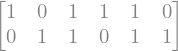

In [123]:
G = np.array(
    [
        [1, 0, 1, 1, 1, 0],
        [0, 1, 1, 0, 1, 1],
    ]
)

k, n = G.shape
m = n - k

display(Matrix(G))
display((n, k, m))

(b) Construa a tabela de codificação ($Enc$) $u \mapsto v$


R: A tabela de codificação é gerada a partir da multiplicação matricial da matrix com as mensagens $u$ e da matrix binária $G$

$$
v = uG
$$

'u'

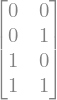

'v'

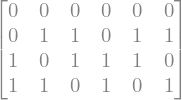

In [124]:
u = np.array([list(bin(i)[2:].zfill(k)) for i in range(2**k)], dtype=(np.int8))
display("u")
display(Matrix(u))

display("v")
v = (u @ G) % 2
display(Matrix(v))

(c) Determine a distância mínima, a capacidade de correção e a distribuição de peso das palavra-código.

In [125]:
def hamming_distance(a, b):
    distance = 0

    for i, _ in enumerate(a):
        if a[i] != b[i]:
            distance += 1

    return distance


def hamming_weight(a):
    return a.sum()


weights = np.apply_along_axis(hamming_weight, 1, v)
display(Matrix(weights))

d_min = weights[1:].min()
print(f"d_min = {d_min}")

t = int(np.floor((d_min - 1) / 2))
print(f"t = {t}")

d_min = 4
t = 1


(d) Contrua um arranjo-padrão.

In [134]:
ap = np.zeros((2**m, 2**k, n), dtype=np.int8)

ap[1] = v

e = [list(bin(i)[2:].zfill(n)) for i in range(1, m)]

e

[['0', '0', '0', '0', '0', '1'],
 ['0', '0', '0', '0', '1', '0'],
 ['0', '0', '0', '0', '1', '1']]

(e) Construa uma tabela síndrome padrão-de-erro $u \mapsto v$

(f) Utilize a tabela da letra (e) padrão decodificar a palavra recebida $b=100010$